# Capstone 1 - Terror Events Data Analysis

Data taken from: https://www.start.umd.edu/gtd/contact/

Last accessed 1 Feb 2019

## Imports

In [2]:
# from __future__ import division
import numpy as np

import pandas as pd
from pandas import Series, DataFrame

from numpy.random import randn
from scipy import stats

# import seaborn as sns
# sns.set_style('whitegrid')

# import math

# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import LinearRegression
# from sklearn.cross_validation import train_test_split
# from sklearn import metrics

# import statsmodels.api as sm

from pprint import pprint

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
%matplotlib inline

## From Amirul
Sooo, I think the best way to justify some of our points is by splitting the terrorist attacks according to 1) Location, 2) Type of attack, 3) Motive. Location is the places of interest that are possible targets of terrorist attacks. Location can also mean Urban vs Suburban attacks. Both data can help to justify why we choose to tackle indoor attacks, instead of open area locations. Data on Type of attack can help to justify why we tackle on hostage situations/casualties, instead of solely just mass shooting/suicide bombing. The motive is researched to supplement and reinforce these justification.

## Read raw data

In [13]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', delimiter=',', low_memory = False)

        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region   ...    addnotes scite1 scite2  scite3  \
0  Dominican Republic       2   ...         NaN    NaN    NaN     NaN   
1              Mexico       1   ...         NaN    NaN    NaN     NaN   
2         Philippines       5   ...         NaN    NaN    NaN     NaN   
3              Greece       8   ...         NaN    NaN    NaN     NaN   
4               Japan       4   ...         NaN    NaN    NaN     NaN   

   dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0      PGIS    

## Data Head

In [15]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Exploring the data

In [11]:
print(df.size)
print(list(df))

24528285
['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2

## Counts by attack type

For the entire dataset, count unique values of `eventid` for each category listed in `attacktype1_txt`.

In [50]:
counts_by_attack_type_alltime = df.groupby('attacktype1_txt')['eventid'].nunique()

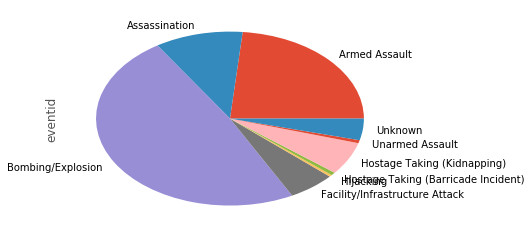

In [48]:
counts_by_attack_type_alltime.plot.pie()

Of course, we should probably look at terrorist events worldwide in recent years

Let's narrow the scope of terrorist attacks to within the past 10 and 5 years.

### 10 years